In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# this is just the original hero network file
# we group by to get the duplicate count
data1 = pd.read_csv("hero-networkA.csv")
data1 = data1.groupby(['hero1','hero2']).size().reset_index()
data1.rename(columns = {0: 'weight'}, inplace = True)

# this is the file with column switched
data2 = pd.read_csv("hero-networkB.csv")
data2 = data2.groupby(['hero1','hero2']).size().reset_index()
data2.rename(columns = {0: 'weight'}, inplace = True)

In [5]:
# we concat to one list
dataAll = pd.concat([data1, data2])

In [6]:
# we group again so that example A-B and B-A will all add to weights
dataAll = dataAll.groupby(['hero1','hero2']).agg({'weight':np.sum}).reset_index()
dataAll.rename(columns = {0: 'weight'}, inplace = True)

In [7]:
dataAll.head(10)

,hero1,hero2,weight
0,24-HOUR MAN/EMMANUEL,"FROST, CARMILLA",1
1,24-HOUR MAN/EMMANUEL,G'RATH,1
2,24-HOUR MAN/EMMANUEL,KILLRAVEN/JONATHAN R,1
3,24-HOUR MAN/EMMANUEL,M'SHULLA,1
4,24-HOUR MAN/EMMANUEL,OLD SKULL,1
5,3-D MAN/CHARLES CHAN,AJAK/TECUMOTZIN [ETE,1
6,3-D MAN/CHARLES CHAN,ANGEL/WARREN KENNETH,1
7,3-D MAN/CHARLES CHAN,ANT-MAN II/SCOTT HAR,1
8,3-D MAN/CHARLES CHAN,ANT-MAN/DR. HENRY J.,2
9,3-D MAN/CHARLES CHAN,ARABIAN KNIGHT/ABDUL,1


In [9]:
# realised that the edgelist function does not care the order of nodes.
# A-B and B-A is the same to it. So it will take the latest copy it finds.
# therefore duplicates will be ignored, and the latest copy with correct weight forms the graph
g = nx.from_pandas_edgelist(dataAll, 'hero1', 'hero2', edge_attr=True)

In [12]:
# number of nodes = no of unique characters
len(g) 

6426

THOR/DR. DONALD BLAK has 1289 neighbors in comic books.

CAPTAIN AMERICA 386
IRON MAN/TONY STARK  344
ODIN [ASGARDIAN] 266
VISION  255
SCARLET WITCH/WANDA  254
WASP/JANET VAN DYNE  238
HAWK 210
BALDER [ASGARDIAN] 209
SIF 204
ANT-MAN/DR. HENRY J. 189
VOLSTAGG 187
FANDRAL [ASGARDIAN] 186
HOGUN [ASGARDIAN] 186
LOKI [ASGARDIAN] 182
JARVIS, EDWIN  160
MR. FANTASTIC/REED R 129
THING/BENJAMIN J. GR 126
WONDER MAN/SIMON WIL 125
HUMAN TORCH/JOHNNY S 124
SHE-HULK/JENNIFER WA 123
HERCULES [GREEK GOD] 114
KINCAID, DR. JANE FO 112
HEIMDALL [ASGARDIAN] 111
INVISIBLE WOMAN/SUE  111
BLACK PANTHER/T'CHAL 103
QUICKSILVER/PIETRO M 99
SPIDER-MAN/PETER PAR 95
BEAST/HENRY &HANK& P 90
CAPTAIN MARVEL II/MO 84
ENCHANTRESS/AMORA/HE 78
KARNILLA [ASGARDIAN] 76
HULK/DR. ROBERT BRUC 72
VIZIER 72
SUB-MARINER/NAMOR MA 62
BLACK WIDOW/NATASHA  61


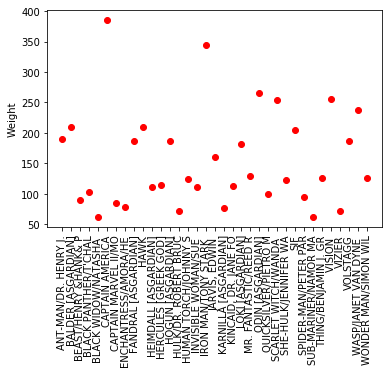

In [231]:
# how many neighbors does certain hero have?
print("THOR/DR. DONALD BLAK has", g.degree('THOR/DR. DONALD BLAK'), "neighbors in comic books.")

# Find neighbor of Thor with weight rank:
print()
a=[]
b=[]
for nb in g.adj['THOR/DR. DONALD BLAK']:
#    print(nb,g.edges['THOR/DR. DONALD BLAK',nb].get('weight'))
    a.append(nb)
    b.append(g.edges['THOR/DR. DONALD BLAK',nb].get('weight'))
mydict = dict(zip(a, b))
import operator
sorted_d = sorted(mydict.items(), key=operator.itemgetter(1),reverse=True)
plot1=sorted_d[:35]
n=[]
s=[]
thor_comic=[]
for i in plot1:
    name=i[0]
    score=i[1]
    n.append(name)
    s.append(score)
    print(name,score)
plt.plot(n, s, 'ro')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()
# plot1=pd.DataFrame.from_records(sorted_d[:35])
# plot1.to_excel('weight.xls')

In [230]:
#Map degree centrality of characters in Thor movie series
deg_pred = nx.degree_centrality(g)
# print(deg_pred)
a=[]
b=[]
c=[]
for i in sorted_d :
    pred=i[0]
    c.append(pred)
for j in c:
#     print(i,deg_pred[i])
    a.append(j)
    b.append(deg_pred[j])
mydict2 = dict(zip(a, b))
import operator
sorted_deg = sorted(mydict2.items(), key=operator.itemgetter(1),reverse=True)
sorted_deg[:35]


[('CAPTAIN AMERICA', 0.2969649805447471),
 ('SPIDER-MAN/PETER PAR', 0.2703501945525292),
 ('IRON MAN/TONY STARK ', 0.23688715953307396),
 ('THING/BENJAMIN J. GR', 0.2203891050583658),
 ('MR. FANTASTIC/REED R', 0.21463035019455254),
 ('WOLVERINE/LOGAN ', 0.21338521400778213),
 ('HUMAN TORCH/JOHNNY S', 0.21182879377431907),
 ('SCARLET WITCH/WANDA ', 0.20622568093385216),
 ('BEAST/HENRY &HANK& P', 0.19719844357976654),
 ('VISION ', 0.19315175097276266),
 ('INVISIBLE WOMAN/SUE ', 0.19237354085603114),
 ('HAWK', 0.18287937743190663),
 ('WASP/JANET VAN DYNE ', 0.16980544747081713),
 ('ANT-MAN/DR. HENRY J.', 0.1684046692607004),
 ('CYCLOPS/SCOTT SUMMER', 0.1682490272373541),
 ('ANGEL/WARREN KENNETH', 0.16700389105058366),
 ('STORM/ORORO MUNROE S', 0.16684824902723736),
 ('SHE-HULK/JENNIFER WA', 0.16669260700389107),
 ('DR. STRANGE/STEPHEN ', 0.16607003891050584),
 ('HULK/DR. ROBERT BRUC', 0.1642023346303502),
 ('WONDER MAN/SIMON WIL', 0.16077821011673152),
 ('PROFESSOR X/CHARLES ', 0.16062256

In [229]:
#Map eigenvector centrality of characters in Thor movie series
eig_pred = nx.eigenvector_centrality(g,weight='weight')
for i in c:
    sorted_eig = sorted(eig_pred.items(), key=operator.itemgetter(1),reverse=True)
sorted_eig[:35]


[('CAPTAIN AMERICA', 0.29117451850277637),
 ('THING/BENJAMIN J. GR', 0.2328401515754794),
 ('HUMAN TORCH/JOHNNY S', 0.22872890254260173),
 ('IRON MAN/TONY STARK ', 0.2250559463003753),
 ('MR. FANTASTIC/REED R', 0.22479166499680184),
 ('INVISIBLE WOMAN/SUE ', 0.21634025319728656),
 ('SCARLET WITCH/WANDA ', 0.2127514672442134),
 ('VISION ', 0.20960675720630023),
 ('THOR/DR. DONALD BLAK', 0.19950137843080934),
 ('WASP/JANET VAN DYNE ', 0.19712504344548468),
 ('HAWK', 0.17699935559191543),
 ('ANT-MAN/DR. HENRY J.', 0.17109537409584136),
 ('BEAST/HENRY &HANK& P', 0.15724661925653646),
 ('WONDER MAN/SIMON WIL', 0.14343968938571033),
 ('CYCLOPS/SCOTT SUMMER', 0.13570762378904463),
 ('WOLVERINE/LOGAN ', 0.13148600306420885),
 ('SPIDER-MAN/PETER PAR', 0.12905500576875092),
 ('STORM/ORORO MUNROE S', 0.12263532126200975),
 ('PROFESSOR X/CHARLES ', 0.11651639554050551),
 ('SHE-HULK/JENNIFER WA', 0.11470897747025914),
 ('JARVIS, EDWIN ', 0.10922834355453878),
 ('QUICKSILVER/PIETRO M', 0.10750504133

In [224]:
# Get top 36 most similar characters with Thor
import pickle
filename = 'node2vec_model 20-25-125.sav'
#pickle.dump(model, open(filename, 'wb'))

model = pickle.load(open(filename, 'rb'))
model.wv.most_similar('THOR/DR. DONALD BLAK',topn=35)

[('EXECUTIONER II/SKURG', 0.928727388381958),
 ('ODIN [ASGARDIAN]', 0.9078078269958496),
 ('LOKI [ASGARDIAN]', 0.8980997204780579),
 ('ENCHANTRESS/AMORA/HE', 0.8897565007209778),
 ('SIF', 0.8771006464958191),
 ('HEIMDALL [ASGARDIAN]', 0.8732444643974304),
 ('BALDER [ASGARDIAN]', 0.8708019256591797),
 ('SURTUR', 0.8683395385742188),
 ('KINCAID, DR. JANE FO', 0.8629634380340576),
 ('KRISTA', 0.8620550632476807),
 ('HAROKIN [ASGARDIAN]', 0.8597990870475769),
 ('HOGUN [ASGARDIAN]', 0.8588401079177856),
 ('FANDRAL [ASGARDIAN]', 0.8552932739257812),
 ('UTGARD-LOKI', 0.8519181609153748),
 ('VOLSTAGG', 0.8473178148269653),
 ('TYR', 0.8443272113800049),
 ('HOBBS, HARRIS', 0.8374972343444824),
 ('VIZIER', 0.8370747566223145),
 ('FRIGGA', 0.8365119695663452),
 ('VOLLA', 0.8284319639205933),
 ('DESTROYER III', 0.8258792757987976),
 ('SETH II', 0.8245316743850708),
 ('HILDEGARDE [ASGARDIA', 0.8231252431869507),
 ('LORELEI II/MELODI [A', 0.8185877799987793),
 ('KARNILLA [ASGARDIAN]', 0.8138706684112

In [225]:
model.wv.most_similar('BLACK WIDOW/NATASHA ',topn=20)

[("DEATHCRY [SHI'AR]", 0.8271957635879517),
 ('ANT-MAN/DR. HENRY J.', 0.7780990600585938),
 ('HERCULES [GREEK GOD]', 0.7637271881103516),
 ('MANTIS (SPACE PHANTO', 0.7598028779029846),
 ('PETROVITCH, IVAN', 0.7570921182632446),
 ('NEUT', 0.7555552124977112),
 ("ZA'KEN", 0.7348362803459167),
 ('MADAME MASQUE III', 0.7346481680870056),
 ('TUC', 0.7337144017219543),
 ('SWORDSMAN III/PHILIP', 0.7301225662231445),
 ('CARINA/CARINA WALTER', 0.7300289273262024),
 ('JOCASTA II', 0.7289251685142517),
 ('VISION ', 0.726361870765686),
 ("T'KYLL ALABAR", 0.7189494967460632),
 ('TABULA RASA', 0.7109546661376953),
 ('STORM, CHILI', 0.7104991674423218),
 ('WATCHLORD/', 0.7066676020622253),
 ('WASP/JANET VAN DYNE ', 0.7058573961257935),
 ('PROCTOR', 0.6989647150039673),
 ('NELIT', 0.6984421610832214)]

In [226]:
model.wv.most_similar("BLACK PANTHER/T'CHAL",topn=20)

[('LYNNE, MONICA', 0.8211736679077148),
 ('NECRODAMUS', 0.7893414497375488),
 ('ADAMS, NICOLE NIKKI', 0.7757622003555298),
 ('SWORDSMAN/JACQUES DU', 0.7754400968551636),
 ('ROSS, EVERETT KENNET', 0.7618798017501831),
 ('WHITE WOLF/HUNTER', 0.7536892890930176),
 ("KILLMONGER, ERIC/N'J", 0.7512307167053223),
 ('RED GUARDIAN II/ALEX', 0.750104546546936),
 ('TAKU', 0.7439490556716919),
 ('PRESTER JOHN', 0.742969274520874),
 ('STINGER II/', 0.7412084341049194),
 ('ANT-MAN/DR. HENRY J.', 0.7402250170707703),
 ('MASTER PANDEMONIUM/M', 0.7317308187484741),
 ('BLACK KNIGHT III/EOB', 0.7280455827713013),
 ('GRIM REAPER/ERIC WIL', 0.7279908657073975),
 ('VISION ', 0.7267704606056213),
 ('ZURI', 0.7261205911636353),
 ('WASP/JANET VAN DYNE ', 0.7252748012542725),
 ('AMENHOTEP', 0.7234084606170654),
 ('LLOIGOROTH', 0.7214350700378418)]

In [227]:
model.wv.most_similar('GAMBIT/REMY LEBEAU ',topn=20)

[('PSYLOCKE/ELISABETH B', 0.8846172094345093),
 ('CHROME/', 0.8843469619750977),
 ('ROGUE /', 0.8744920492172241),
 ('DELGADO', 0.8635722994804382),
 ('MACTAGGART, JOE', 0.8598717451095581),
 ('HAZARD/CARTER RYKING', 0.8535719513893127),
 ('RASPUTIN, MIKHAIL', 0.8491182327270508),
 ('EJULP', 0.8478350639343262),
 ('STORM/ORORO MUNROE S', 0.8434261083602905),
 ('TRION', 0.8420971035957336),
 ('MARROW/SARAH ', 0.8419917225837708),
 ('MR. SINISTER/NATHAN ', 0.8386924862861633),
 ('SISTER MARIA', 0.8299195766448975),
 ('BRAIN CELL/', 0.8242301940917969),
 ('WANDERER', 0.8212308883666992),
 ('MEME', 0.8183774948120117),
 ('WOLVERINE/LOGAN ', 0.8162658214569092),
 ('RYKING, ALEXANDER', 0.8130955100059509),
 ('PAM', 0.8125970363616943),
 ('AVATAR', 0.8125902414321899)]

In [228]:
model.wv.most_similar("DR. STRANGE/STEPHEN ",topn=20)

[('CLEA', 0.967788577079773),
 ('WONG', 0.9595887660980225),
 ('CHANG, IMEI', 0.9040884971618652),
 ('ANCIENT ONE', 0.8997129797935486),
 ('RINTRAH', 0.890948474407196),
 ('WOLFE, SARA', 0.8857549428939819),
 ('BLESSING, MORGANA', 0.8593155145645142),
 ('DORMAMMU', 0.8550987839698792),
 ('BARON MORDO/KARL MOR', 0.8346185088157654),
 ('BLACK, CYRUS', 0.8286777138710022),
 ('ASMODEUS', 0.8253239393234253),
 ('AGAMOTTO', 0.8204836845397949),
 ('AZRAEL', 0.8200507760047913),
 ('SHADOW QUEEN/SHIALMA', 0.8171319961547852),
 ('UMAR', 0.8161966800689697),
 ('AGGAMON', 0.8161532282829285),
 ('DR. STRANGER YET', 0.8149229288101196),
 ('INTERLOPER', 0.8134626150131226),
 ('SHUMA-GORATH', 0.8111504316329956),
 ('APPALLA', 0.8105378150939941)]